# Imports

In [9]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [10]:
n = 6 # 5~9
label_name = "stat5" # update stat number
layers = [26, 16] # mess with the layers (last layer should be the number of possibilities for this stat)

epochs = 6000 # increase if the loss is still decreasing by the end of training
train_split, test_split = 0.8, 0.2
learning_rate = 0.003 # don't change probably
momentum = 0.9 # don't change probably
batch_size = 64 # higher acc and longer runtime if smaller

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [11]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [12]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 25.05180835723877
Epoch 1, Loss 25.028825759887695
Epoch 2, Loss 24.95470142364502
Epoch 3, Loss 24.944279432296753
Epoch 4, Loss 24.9024178981781
Epoch 5, Loss 24.894371271133423
Epoch 6, Loss 24.860180377960205
Epoch 7, Loss 24.77834963798523
Epoch 8, Loss 24.791229724884033
Epoch 9, Loss 24.731525659561157
Epoch 10, Loss 24.667892932891846
Epoch 11, Loss 24.639139890670776
Epoch 12, Loss 24.6183979511261
Epoch 13, Loss 24.550801753997803
Epoch 14, Loss 24.501030445098877
Epoch 15, Loss 24.467992544174194
Epoch 16, Loss 24.41414785385132
Epoch 17, Loss 24.386464834213257
Epoch 18, Loss 24.33238172531128
Epoch 19, Loss 24.274494171142578
Epoch 20, Loss 24.287981748580933
Epoch 21, Loss 24.172295093536377
Epoch 22, Loss 24.169644117355347
Epoch 23, Loss 24.068336963653564
Epoch 24, Loss 23.964592933654785
Epoch 25, Loss 23.93289279937744
Epoch 26, Loss 23.90037727355957
Epoch 27, Loss 23.781094789505005
Epoch 28, Loss 23.724466800689697
Epoch 29, Loss 23.62684941291809
Ep

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

C:\Users\lewil\AppData\Local\Temp\ipykernel_10364\2152728193.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


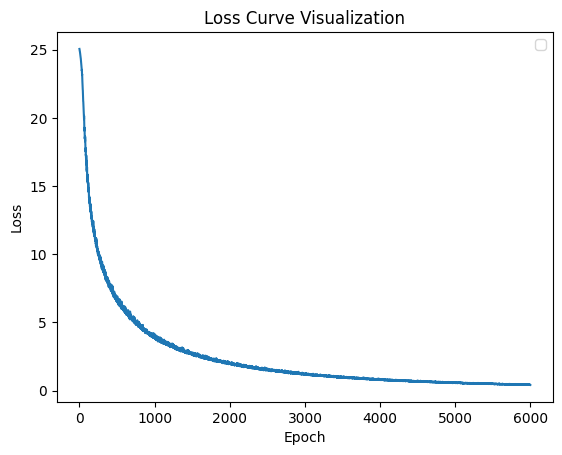

In [13]:
# plot loss vs epoch
plt.plot([i for i in range(epochs)], losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss Curve Visualization')
plt.legend()
plt.savefig(f'figures/loss_curve_{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 58, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 74, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 78, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 84, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 69, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 59, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]


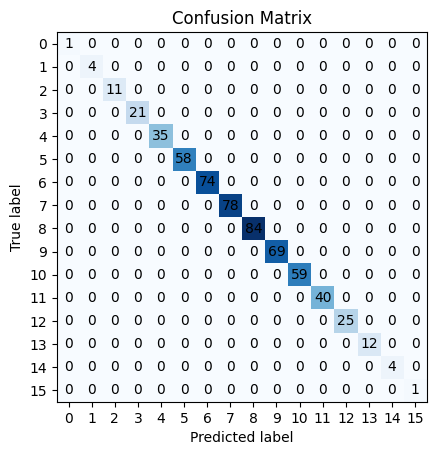

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Accuracy for class 2 = 100.0%
Accuracy for class 3 = 100.0%
Accuracy for class 4 = 100.0%
Accuracy for class 5 = 100.0%
Accuracy for class 6 = 100.0%
Accuracy for class 7 = 100.0%
Accuracy for class 8 = 100.0%
Accuracy for class 9 = 100.0%
Accuracy for class 10 = 100.0%
Accuracy for class 11 = 100.0%
Accuracy for class 12 = 100.0%
Accuracy for class 13 = 100.0%
Accuracy for class 14 = 100.0%
Accuracy for class 15 = 100.0%
Overall accuracy = 100.0%


In [18]:
confusion_matrix = evaluate_model(model, training_dataset) # try training_dataset and test_dataset

print(confusion_matrix)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

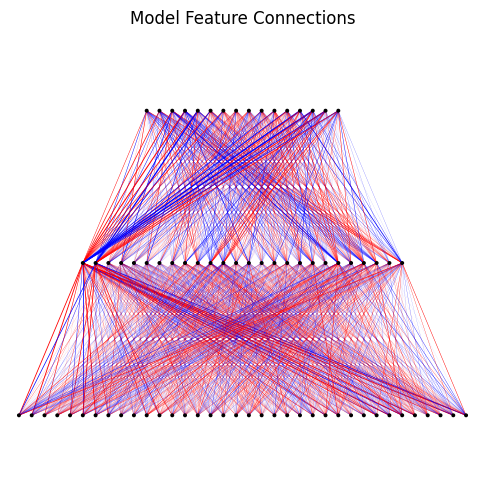

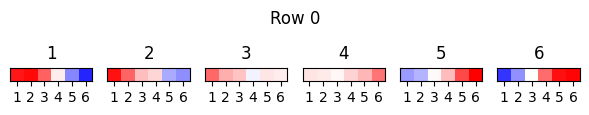

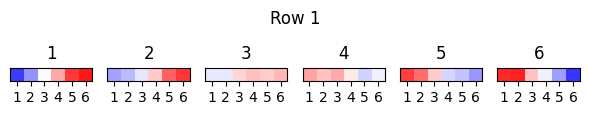

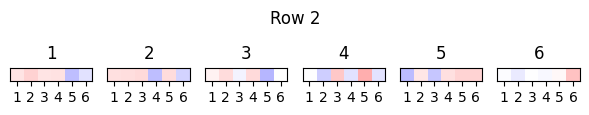

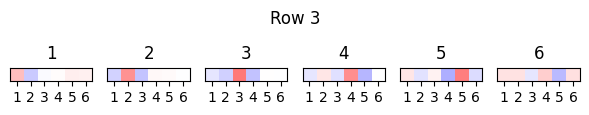

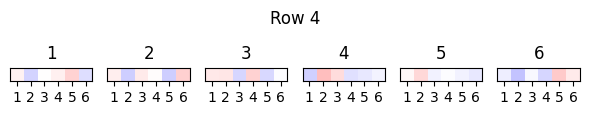

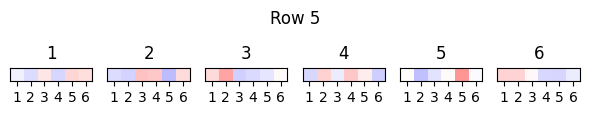

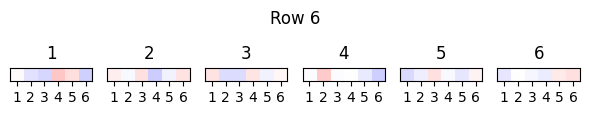

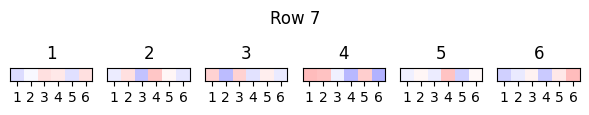

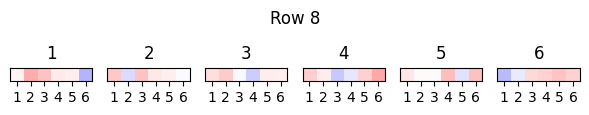

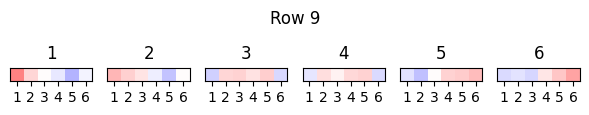

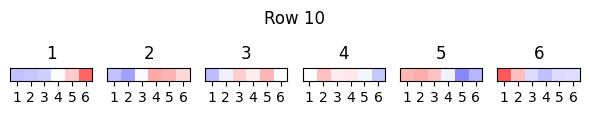

In [15]:
model.plot_connections()

#model.plot_heatmap_feature(1, 0)
#model.plot_heatmap_feature(1, 1)

for i in range(11):model.plot_heatmap_feature(0, i)
